0 1
1 1
2 1
3 1
0 2
1 2
2 2
3 2
3


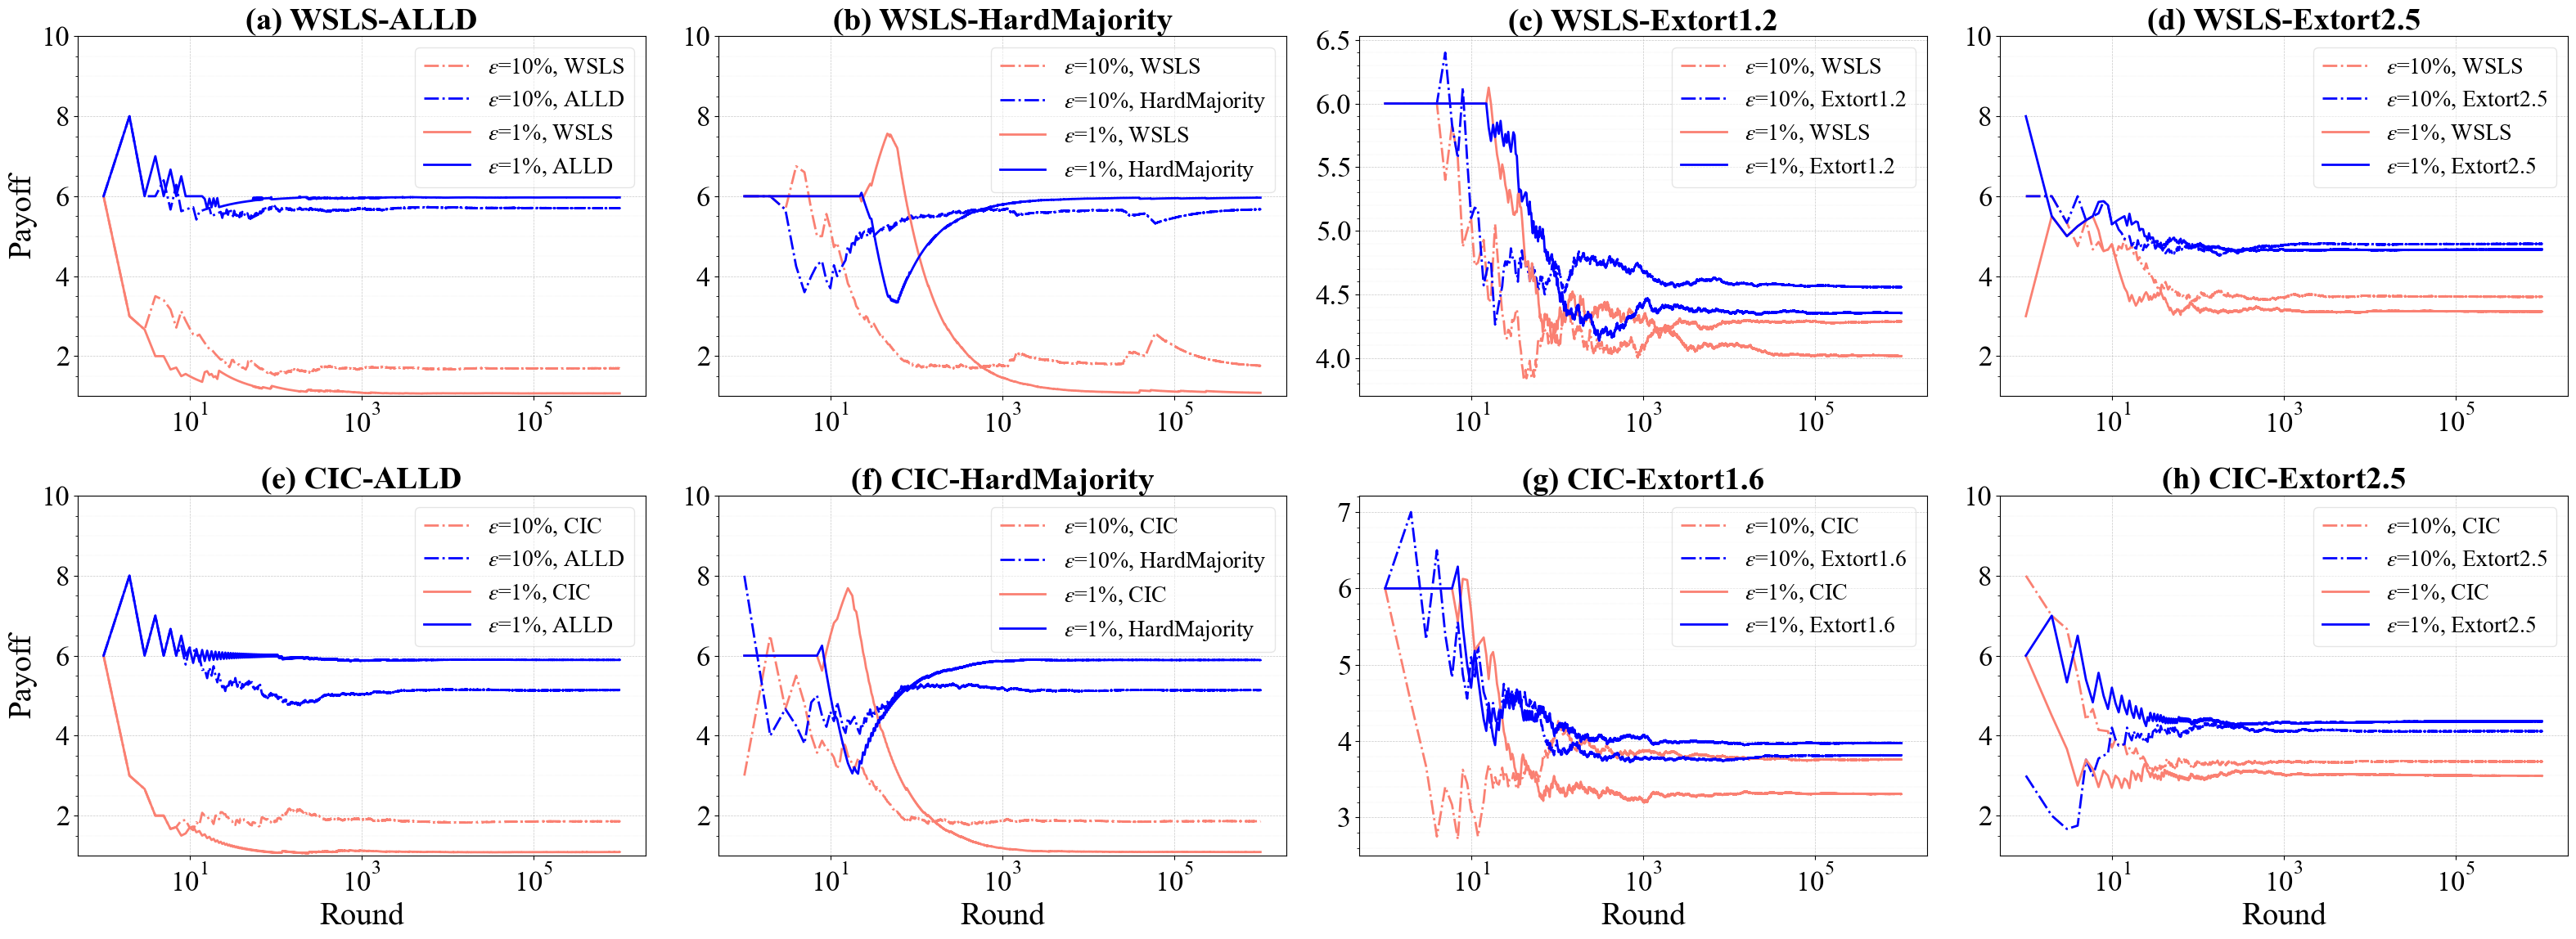

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Times New Roman', size=24)
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def plot_subplot(ax, file_paths, step, strategy_name, opponent_name, is_log=True, subplot_label=''):
    strategy_colors = {'WSLS': 'salmon', 'CIC': 'salmon'}
    error_line_styles = {'0.01': '-', '0.1': '-.'}

    for file_path in file_paths:
        data = pd.read_csv(file_path, header=None, nrows=1000000)
        data['Step'] = range(1, len(data) + 1)
        data['Strategy_cumulative_payoff_normalized'] = data[0] / data['Step']
        data['Opponent_cumulative_payoff_normalized'] = data[1] / data['Step']

        line_color = strategy_colors[strategy_name]
        error_rate = '0.1' if '0.1' in file_path else '0.01'
        line_style = error_line_styles[error_rate]

        error_rate_percentage = int(float(error_rate) * 100)
        strategy_label = f'$\epsilon$={error_rate_percentage}%, {strategy_name}'
        opponent_label = f'$\epsilon$={error_rate_percentage}%, {opponent_name}'

        ax.plot(data['Step'], data['Strategy_cumulative_payoff_normalized'], label=strategy_label, color=line_color, linestyle=line_style, linewidth=2)
        ax.plot(data['Step'], data['Opponent_cumulative_payoff_normalized'], label=opponent_label, color='blue', linestyle=line_style, linewidth=2)

    ax.set_xscale('log') if is_log else None
    ax.set_xlabel("Round", fontsize=28)
    ax.set_ylabel("Payoff", fontsize=28)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.legend(loc='center right', prop={'size': 22}, framealpha=0.5,fontsize = 25)
    ax.set_title(subplot_label, fontsize=28, loc='center')

    ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
    ax.minorticks_on()
    ax.grid(True, which='minor', linestyle=':', linewidth=0.3, alpha=0.5)
    if subplot_label not in ['(c) WSLS-Extort1.2','(g) CIC-Extort1.6']:
        ax.set_ylim(1, 10)
    ax.legend(loc='upper right', prop={'size': 20}, framealpha=0.5)


    if subplot_label in ['(b) WSLS-HardMajority', '(c) WSLS-Extort1.2', '(d) WSLS-Extort2.5', '(f) CIC-HardMajority', '(g) CIC-Extort1.6', '(h) CIC-Extort2.5']:
        ax.set_ylabel('')

    if subplot_label in ['(a) WSLS-ALLD', '(b) WSLS-HardMajority', '(c) WSLS-Extort1.2', '(d) WSLS-Extort2.5']:
        ax.set_xlabel('')

wsls_opponents = ['ALLD', 'HardMajority', 'Extort1.2', 'Extort2.5']
wsls_file_paths = {
    'ALLD': ['./data/WSLS_vs_ALLD_realtime_payoff_error=0.1.csv', './data/WSLS_vs_ALLD_realtime_payoff_error=0.01.csv'],
    'HardMajority': ['./data/WSLS_vs_HardMajority_realtime_payoff_error=0.1.csv', './data/WSLS_vs_HardMajority_realtime_payoff_error=0.01.csv'],
    'Extort1.2': ['./data/WSLS_vs_Extort1_2_independent_realtime_payoff_error=0.1.csv', './data/WSLS_vs_Extort1_2_independent_realtime_payoff_error=0.01.csv'],
    'Extort2.5': ['./data/WSLS_vs_Extort2_5_independent_realtime_payoff_error=0.1.csv', './data/WSLS_vs_Extort2_5_independent_realtime_payoff_error=0.01.csv']
}

cic_opponents = ['ALLD', 'HardMajority', 'Extort1.6', 'Extort2.5']
cic_file_paths = {
    'ALLD': ['./data/CIC_vs_ALLD_realtime_payoff_error=0.1.csv', './data/CIC_vs_ALLD_realtime_payoff_error=0.01.csv'],
    'HardMajority': ['./data/CIC_vs_HardMajority_realtime_payoff_error=0.1.csv', './data/CIC_vs_HardMajority_realtime_payoff_error=0.01.csv'],
    'Extort1.6': ['./data/CIC_vs_Extort1_6_independent_realtime_payoff_error=0.1.csv', './data/CIC_vs_Extort1_6_independent_realtime_payoff_error=0.01.csv'],
    'Extort2.5': ['./data/CIC_vs_Extort2_5_independent_realtime_payoff_error=0.1.csv', './data/CIC_vs_Extort2_5_independent_realtime_payoff_error=0.01.csv']
}

subplot_labels = ['(a) WSLS-ALLD', '(b) WSLS-HardMajority', '(c) WSLS-Extort1.2', '(d) WSLS-Extort2.5', '(e) CIC-ALLD', '(f) CIC-HardMajority', '(g) CIC-Extort1.6', '(h) CIC-Extort2.5']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(32, 12))

for i, opponent_name in enumerate(wsls_opponents):
    print(i,1)
    ax = axes[0, i]
    plot_subplot(ax, wsls_file_paths[opponent_name], 1000000, 'WSLS', opponent_name, is_log=True, subplot_label=subplot_labels[i])

for i, opponent_name in enumerate(cic_opponents):
    print(i,2)
    ax = axes[1, i]
    plot_subplot(ax, cic_file_paths[opponent_name], 1000000, 'CIC', opponent_name, is_log=True, subplot_label=subplot_labels[i + 4])

plt.tight_layout()
print(3)
plt.savefig('./figure/weak_wsls_cic2.pdf', format="pdf", bbox_inches='tight', dpi=900)
plt.show()


/var/folders/dx/78h57qxd2wd40w3yh42sl6nh0000gn/T/ipykernel_74896/84252849.py:57: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/var/folders/dx/78h57qxd2wd40w3yh42sl6nh0000gn/T/ipykernel_74896/84252849.py:58: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('./figure/strategy_comparison.pdf', format="pdf", bbox_inches='tight', dpi=900)
/Users/caozhaoheng/opt/anaconda3/envs/my_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


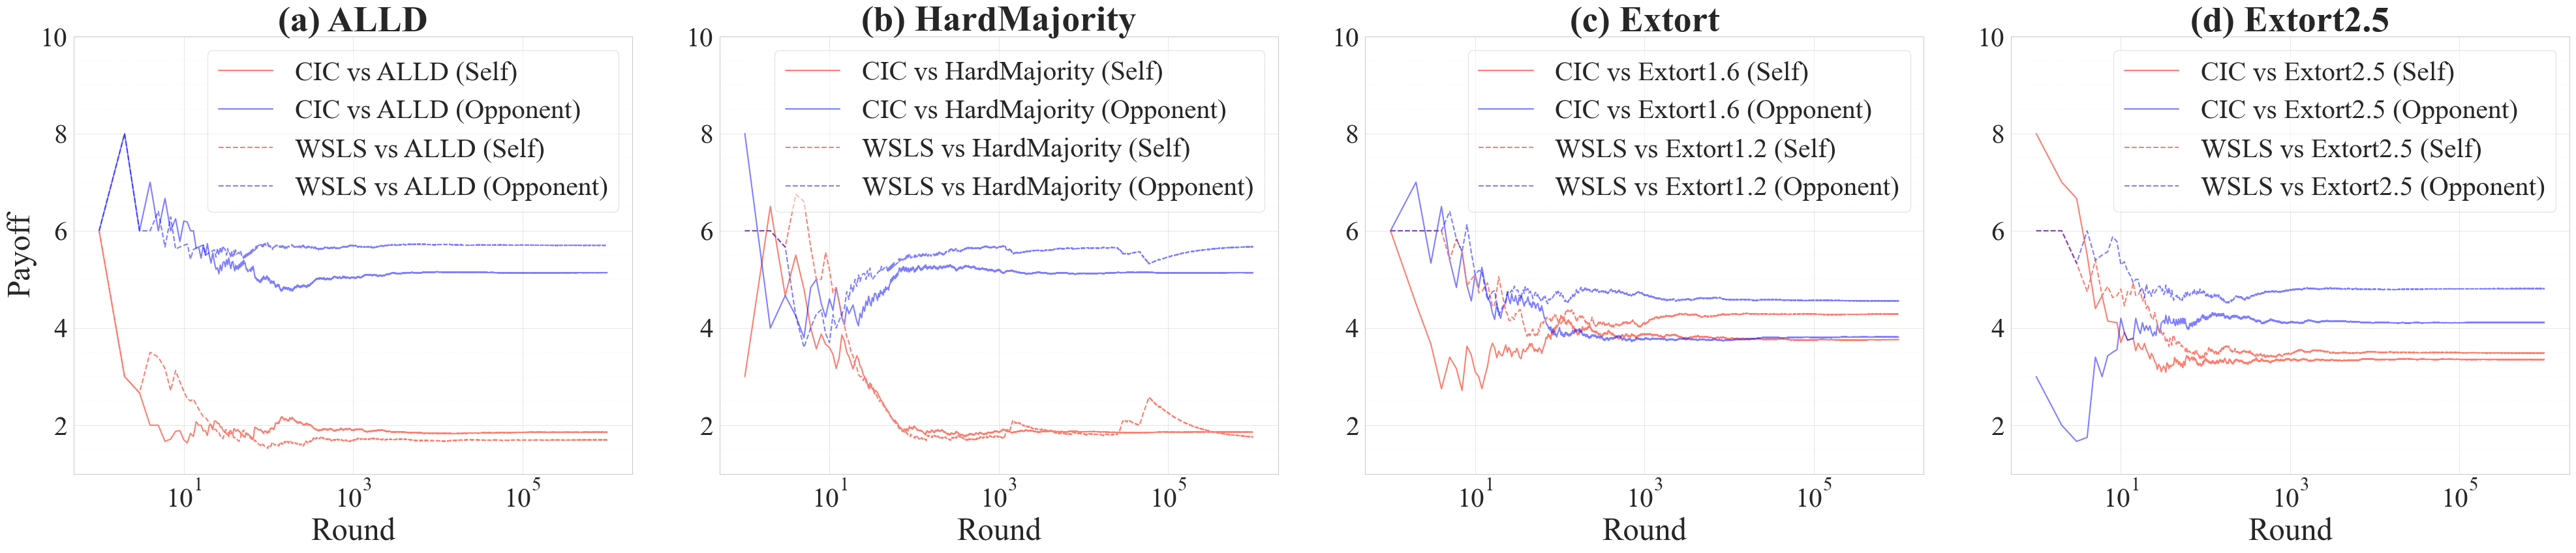

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Times New Roman', size=24)
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def plot_data(ax, file_path, strategy_name, opponent_name, strategy_color, opponent_color, line_style, is_log=True):
    display_opponent_name = opponent_name.replace("_independent", "")

    data = pd.read_csv(file_path, header=None, nrows=1000000)
    data['Step'] = range(1, len(data) + 1)
    data['Strategy_cumulative_payoff_normalized'] = data[0] / data['Step']
    data['Opponent_cumulative_payoff_normalized'] = data[1] / data['Step']

    ax.plot(data['Step'], data['Strategy_cumulative_payoff_normalized'], color=strategy_color, linestyle=line_style, label=f'{strategy_name} vs {display_opponent_name} (Self)')
    ax.plot(data['Step'], data['Opponent_cumulative_payoff_normalized'], color=opponent_color, linestyle=line_style, alpha=0.5, label=f'{strategy_name} vs {display_opponent_name} (Opponent)')

    ax.set_xscale('log') if is_log else None
    ax.set_ylim(1, 10)
    ax.set_xlabel("Round", fontsize=35)
    if opponent_name in ['ALLD']:
        ax.set_ylabel('Payoff', fontsize=35)
    else:
        ax.set_ylabel('')
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.legend(prop={'size': 30}, framealpha=0.5)
    ax.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.7)
    ax.minorticks_on()
    ax.grid(True, which='minor', linestyle=':', linewidth=0.3, alpha=0.5)

cic_opponents = ['ALLD', 'HardMajority', 'Extort1.6_independent', 'Extort2.5_independent']
wsls_opponents = ['ALLD', 'HardMajority', 'Extort1.2_independent', 'Extort2.5_independent']
subplot_labels = ['(a) ALLD', '(b) HardMajority', '(c) Extort', '(d) Extort2.5']

cic_file_paths = [f'./data/CIC_vs_{opponent.replace(".", "_")}_realtime_payoff_error=0.1.csv' for opponent in cic_opponents]
wsls_file_paths = [f'./data/WSLS_vs_{opponent.replace(".", "_")}_realtime_payoff_error=0.1.csv' for opponent in wsls_opponents]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(40, 9))

strategy_color = 'salmon'
opponent_color = 'blue'

for i, ax in enumerate(axes):
    plot_data(ax, cic_file_paths[i], 'CIC', cic_opponents[i], strategy_color, opponent_color, '-', is_log=True)
    plot_data(ax, wsls_file_paths[i], 'WSLS', wsls_opponents[i], strategy_color, opponent_color, '--', is_log=True)
    ax.set_title(f'{subplot_labels[i]}', fontsize=40, loc='center')

plt.tight_layout()
plt.savefig('./figure/strategy_comparison.pdf', format="pdf", bbox_inches='tight', dpi=900)
plt.show()